<a href="https://colab.research.google.com/github/pawljmlo/covid-ur-wasting/blob/main/wasting-anaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [424]:
import pandas as pd
import numpy as np

import math

In [425]:
path_overlapping = "/content/drive/MyDrive/projekty/review-ai-covid-ur/data/covid-data-extracted-overlapping.csv"

In [426]:
df = pd.read_csv(path_overlapping)

## basic editing

In [427]:
df.head()

,Reference ID,ID in the review,..Primary study Bibtex ID,Num,Per one,New,Reference,Medium,What,Link,Ver. reported?,Date\nreported,Versions,Ver. Used,Month,Day,Published?,Pub-link,Journal,Conference,Other,Av-Month,Av-Day,Av-Year,Retracted,How many datasets were used?,Total CTs,C-19 CTs,Total \nX-Rays,C-19 \nX-rays,Total other,C-19 other,Viral pneumonia\n(non-COVID),Bacterial pneumonia,Unknown pneumonia,Unclear,Asymptomatic controls,Control patients,C-19 patients,Total patients,Architecture name,Architecture modification,Accuracy,AUC,F1\nDSC\nDice Score\nDSC\nm-DICE,Precision\nPPV,NPV,Sensitivity\nRecall,Specifity,Balanced Accuracy,Other \nmetrics,Post processing,sens+\nspec,both\nscans,"sens,spec,both",CT,X-ray,Other.1
0,chen2020review,15,abbas2020classification,1.0,6.0,NaN,"Asmaa A., Mohammed M. A., Mohamed M. G.:Classi...",Preprint,Arxiv,https://arxiv.org/abs/2003.13815,0.0,0.0,3,U,3,26,1,https://link.springer.com/article/10.1007%2Fs1...,Applied Intelligence,NaN,NaN,9.0,5,2020.0,0.0,"3, N",0,0,196,106,0,0,1.0,0.0,0.0,1,0,NR,NR,NR,AlexNet,NR,9512,9415,NR,NR,NR,NR,NR,NR,NR,NR,0,1,0.0,#DZIEL/0!,"0,540816326530612",#DZIEL/0!
1,islam2020review,91,abbas2020classification,NaN,NaN,NaN,"A. Abbas, M. M. Abdelsamea, and M. M. Gaber, “...",Preprint,Arxiv,https://arxiv.org/abs/2003.13815,0.0,1.0,3,1,3,26,1,https://link.springer.com/article/10.1007%2Fs1...,Applied Intelligence,NaN,NaN,9.0,5,2020.0,0.0,"2, COVID-19 X-ray image database, Japanese Soc...",0,0,196,105,0,0,0.0,0.0,0.0,"1, sars",1,NR,NR,NR,DeTraC-ResNet18,2\3,9512,NR,NR,9336,NR,9791,9187,NR,NR,NR,2,1,1.0,#DZIEL/0!,"0,535714285714286",#DZIEL/0!
2,nguyen2020artificial,46,abbas2020classification,NaN,NaN,NaN,"A. Abbas, M. M. Abdelsamea, and M. M. Gaber, “...",Preprint,Arxiv,https://arxiv.org/abs/2003.13815,0.0,0.0,3,U,3,26,1,https://link.springer.com/article/10.1007%2Fs1...,Applied Intelligence,NaN,NaN,9.0,5,2020.0,0.0,"3, N",NR,NR,NR,NR,0,0,0.0,0.0,0.0,1,0,NR,NR,NR,"ResNet18, DeTraC",NR,9512,NR,NR,NR,NR,9791,9187,NR,NR,NR,2,0,0.0,#VALUE!,#VALUE!,#DZIEL/0!
3,shoeibi2020automated,77,abbas2020classification,NaN,NaN,NaN,"Asmaa A., Mohammed M. A., Mohamed M. G.:Classi...",Preprint,Arxiv,https://arxiv.org/abs/2003.13815,0.0,0.0,3,U,3,26,1,https://link.springer.com/article/10.1007%2Fs1...,Applied Intelligence,NaN,NaN,9.0,5,2020.0,0.0,"2, N",0,0,NR,NR,0,0,1.0,0.0,0.0,0,1,NR,NR,NR,DeTraC (ResNet18),2,9512,NR,NR,NR,NR,9791,9187,NR,NR,"1, Composition Phase",2,0,0.0,#DZIEL/0!,#VALUE!,#DZIEL/0!
4,ulhaq2020computer,64->63,abbas2020classification,NaN,NaN,NaN,"A. Abbas, M. M. Abdelsamea, and M. M. Gaber, ‘...",Preprint,Arxiv,https://arxiv.org/abs/2003.13815,0.0,0.0,3,U,3,26,1,https://link.springer.com/article/10.1007%2Fs1...,Applied Intelligence,NaN,NaN,9.0,5,2020.0,0.0,"2, Japanese Society of Radiological Technology...",0,0,NR,NR,0,0,0.0,0.0,0.0,0,1,NR,NR,NR,"ResNet, ImageNet",NR,9512,NR,NR,9336,NR,9791,9187,NR,NR,NR,2,0,0.0,#DZIEL/0!,#VALUE!,#DZIEL/0!


In [428]:
df.columns

Index(['Reference ID', 'ID in the review', '..Primary study Bibtex ID', 'Num',
       'Per one', 'New', 'Reference', 'Medium', 'What', 'Link',
       'Ver. reported?', 'Date\nreported', 'Versions', 'Ver. Used', 'Month',
       'Day', 'Published?', 'Pub-link', 'Journal', 'Conference', 'Other',
       'Av-Month', 'Av-Day', 'Av-Year', 'Retracted',
       'How many datasets were used?', 'Total CTs', 'C-19 CTs',
       'Total \nX-Rays', 'C-19 \nX-rays', 'Total other', 'C-19 other',
       'Viral pneumonia\n(non-COVID)', 'Bacterial pneumonia',
       'Unknown pneumonia', 'Unclear', 'Asymptomatic controls',
       'Control patients', 'C-19 patients', 'Total patients',
       'Architecture name', 'Architecture modification', 'Accuracy', 'AUC',
       'F1\nDSC\nDice Score\nDSC\nm-DICE', 'Precision\nPPV', 'NPV',
       'Sensitivity\nRecall', 'Specifity', 'Balanced Accuracy',
       'Other \nmetrics', 'Post processing', 'sens+\nspec', 'both\nscans',
       'sens,spec,both', 'CT', 'X-ray', 'Other.

In [429]:
df.columns = ['Reference ID', 'ID in the review', 'Primary study Bibtex ID', 'Num', 'Per one', 'New', 'Reference', 'Medium', 'What', 'Link', 'Was ver. reported?', 
              'Date reported', 'Versions', 'Ver. Used', 'Month', 'Day', 'Published?', 'Pub-link', 'Journal', 'Conference', 'Other', 'Av-Month', 'Av-Day', 'Av-Year', 
              'Retracted', 'How many datasets were used?', 'Total CTs', 'C-19 CTs', 'Total X-Rays', 'C-19 X-rays', 'Total other', 'C-19 other', 'Viral pneumonia (non-COVID)', 
              'Bacterial pneumonia', 'Unknown pneumonia', 'Unclear', 'Asymptomatic controls', 'Control patients', 'C-19 patients', 'Total patients', 'Architecture name', 
              'Architecture modification', 'Accuracy', 'AUC', 'F1', 'Precision', 'NPV', 'Sensitivity', 'Specifity', 'Balanced Accuracy', 'Other metrics', 'Post processing', 
              'Sens. and Spec.', 'Both scans', 'Sens., Spec., Both', 'CT', 'X-ray', 'Other']

In [430]:
df.head()

,Reference ID,ID in the review,Primary study Bibtex ID,Num,Per one,New,Reference,Medium,What,Link,Was ver. reported?,Date reported,Versions,Ver. Used,Month,Day,Published?,Pub-link,Journal,Conference,Other,Av-Month,Av-Day,Av-Year,Retracted,How many datasets were used?,Total CTs,C-19 CTs,Total X-Rays,C-19 X-rays,Total other,C-19 other,Viral pneumonia (non-COVID),Bacterial pneumonia,Unknown pneumonia,Unclear,Asymptomatic controls,Control patients,C-19 patients,Total patients,Architecture name,Architecture modification,Accuracy,AUC,F1,Precision,NPV,Sensitivity,Specifity,Balanced Accuracy,Other metrics,Post processing,Sens. and Spec.,Both scans,"Sens., Spec., Both",CT,X-ray,Other
0,chen2020review,15,abbas2020classification,1.0,6.0,NaN,"Asmaa A., Mohammed M. A., Mohamed M. G.:Classi...",Preprint,Arxiv,https://arxiv.org/abs/2003.13815,0.0,0.0,3,U,3,26,1,https://link.springer.com/article/10.1007%2Fs1...,Applied Intelligence,NaN,NaN,9.0,5,2020.0,0.0,"3, N",0,0,196,106,0,0,1.0,0.0,0.0,1,0,NR,NR,NR,AlexNet,NR,9512,9415,NR,NR,NR,NR,NR,NR,NR,NR,0,1,0.0,#DZIEL/0!,"0,540816326530612",#DZIEL/0!
1,islam2020review,91,abbas2020classification,NaN,NaN,NaN,"A. Abbas, M. M. Abdelsamea, and M. M. Gaber, “...",Preprint,Arxiv,https://arxiv.org/abs/2003.13815,0.0,1.0,3,1,3,26,1,https://link.springer.com/article/10.1007%2Fs1...,Applied Intelligence,NaN,NaN,9.0,5,2020.0,0.0,"2, COVID-19 X-ray image database, Japanese Soc...",0,0,196,105,0,0,0.0,0.0,0.0,"1, sars",1,NR,NR,NR,DeTraC-ResNet18,2\3,9512,NR,NR,9336,NR,9791,9187,NR,NR,NR,2,1,1.0,#DZIEL/0!,"0,535714285714286",#DZIEL/0!
2,nguyen2020artificial,46,abbas2020classification,NaN,NaN,NaN,"A. Abbas, M. M. Abdelsamea, and M. M. Gaber, “...",Preprint,Arxiv,https://arxiv.org/abs/2003.13815,0.0,0.0,3,U,3,26,1,https://link.springer.com/article/10.1007%2Fs1...,Applied Intelligence,NaN,NaN,9.0,5,2020.0,0.0,"3, N",NR,NR,NR,NR,0,0,0.0,0.0,0.0,1,0,NR,NR,NR,"ResNet18, DeTraC",NR,9512,NR,NR,NR,NR,9791,9187,NR,NR,NR,2,0,0.0,#VALUE!,#VALUE!,#DZIEL/0!
3,shoeibi2020automated,77,abbas2020classification,NaN,NaN,NaN,"Asmaa A., Mohammed M. A., Mohamed M. G.:Classi...",Preprint,Arxiv,https://arxiv.org/abs/2003.13815,0.0,0.0,3,U,3,26,1,https://link.springer.com/article/10.1007%2Fs1...,Applied Intelligence,NaN,NaN,9.0,5,2020.0,0.0,"2, N",0,0,NR,NR,0,0,1.0,0.0,0.0,0,1,NR,NR,NR,DeTraC (ResNet18),2,9512,NR,NR,NR,NR,9791,9187,NR,NR,"1, Composition Phase",2,0,0.0,#DZIEL/0!,#VALUE!,#DZIEL/0!
4,ulhaq2020computer,64->63,abbas2020classification,NaN,NaN,NaN,"A. Abbas, M. M. Abdelsamea, and M. M. Gaber, ‘...",Preprint,Arxiv,https://arxiv.org/abs/2003.13815,0.0,0.0,3,U,3,26,1,https://link.springer.com/article/10.1007%2Fs1...,Applied Intelligence,NaN,NaN,9.0,5,2020.0,0.0,"2, Japanese Society of Radiological Technology...",0,0,NR,NR,0,0,0.0,0.0,0.0,0,1,NR,NR,NR,"ResNet, ImageNet",NR,9512,NR,NR,9336,NR,9791,9187,NR,NR,NR,2,0,0.0,#DZIEL/0!,#VALUE!,#DZIEL/0!


## inter-article agreement

In [431]:
review_ids = df['Reference ID'].unique()
review_ids.sort()

In [432]:
len(review_ids), review_ids

(22, array(['chen2020review', 'chen2020survey', 'cui2020diagnostic',
        'dong2020role', 'farhat2020deep', 'ilyas2020detection',
        'islam2020review', 'islam2020survey', 'ito2020review',
        'jalaber2020chest', 'kumar2020review', 'mohamadou2020review',
        'nguyen2020artificial', 'pham2020artificial', 'raj2020role',
        'roberts2020machine', 'salehi2020review', 'shaikh2020current',
        'shi2020review', 'shoeibi2020automated', 'ulhaq2020computer',
        'wynants2020prediction'], dtype=object))

In [433]:
df_agreement = pd.DataFrame(0, index=np.arange(len(review_ids)), columns=review_ids)
df_agreement.index = review_ids
df_agreement.head()

,chen2020review,chen2020survey,cui2020diagnostic,dong2020role,farhat2020deep,ilyas2020detection,islam2020review,islam2020survey,ito2020review,jalaber2020chest,kumar2020review,mohamadou2020review,nguyen2020artificial,pham2020artificial,raj2020role,roberts2020machine,salehi2020review,shaikh2020current,shi2020review,shoeibi2020automated,ulhaq2020computer,wynants2020prediction
chen2020review,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
chen2020survey,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
cui2020diagnostic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
dong2020role,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
farhat2020deep,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [434]:
df_agreement_cases = pd.DataFrame(0, index=np.arange(len(review_ids)), columns=review_ids)
df_agreement_cases.index = review_ids

In [435]:
def check_col_apply(col):
  global sum_frame
  global sum_nr
  global sum_agreed_nr 

  unique_elements = col.unique()
  
  sum_frame += len(unique_elements)
  if ('NR' or 'N') in unique_elements:
    sum_nr += 1
  if ('NR' or 'N') in unique_elements and not (len(unique_elements) == 2):
    sum_agreed_nr += 1

col_apply = ['How many datasets were used?', 'Total CTs', 'C-19 CTs', 'Total X-Rays', 'C-19 X-rays', 'Total other', 'C-19 other', 'Viral pneumonia (non-COVID)', 
              'Bacterial pneumonia', 'Unknown pneumonia', 'Unclear', 'Asymptomatic controls', 'Control patients', 'C-19 patients', 'Total patients', 'Architecture name', 
              'Architecture modification', 'Accuracy', 'AUC', 'F1', 'Precision', 'NPV', 'Sensitivity', 'Specifity', 'Balanced Accuracy', 'Other metrics', 'Post processing']

col_apply = ['Total CTs', 'C-19 CTs', 'Total X-Rays', 'C-19 X-rays', 'Total other', 'C-19 other', 'Viral pneumonia (non-COVID)', 
              'Bacterial pneumonia', 'Unknown pneumonia', 'Unclear', 'Asymptomatic controls', 'Control patients', 'C-19 patients', 'Total patients', 
              'Accuracy', 'AUC', 'F1', 'Precision', 'NPV', 'Sensitivity', 'Specifity', 'Balanced Accuracy', 'Other metrics']

In [436]:
nr = False

In [437]:
sum_single = 0
sum_more_models = 0
sum_comparison = 0

for id, group in df.groupby('Primary study Bibtex ID'):
  # print(id)

  group.sort_values('Reference ID')
  
  if not (group.shape[0] == len(group['Reference ID'].unique())):
    sum_more_models +=1 
    # print(id, group.shape[0], len(group['Reference ID'].unique()))
    continue

  if (group.shape[0] == 1):
    sum_single += 1
    # print(id, group.shape[0], len(group['Reference ID'].unique()))
    continue

  sum_comparison += 1

  for i, row in group.iterrows():

    for j, row_in_row in group.iterrows():
      if not (j > i):
        continue

      global sum_frame
      global sum_nr
      global sum_agreed_nr
      sum_frame = 0
      sum_nr = 0
      sum_agreed_nr = 0
      
      frame = group.loc[(group['Reference ID'] == row['Reference ID']) | (group['Reference ID'] == row_in_row['Reference ID']), col_apply]
      frame.apply(lambda c: check_col_apply(c))

      if nr:
        df_agreement.loc[row['Reference ID'], row_in_row['Reference ID']] += abs(sum_frame - sum_agreed_nr - 2*(sum_nr - sum_agreed_nr) - 2*(len(col_apply) - (sum_nr)))
        df_agreement_cases.loc[row['Reference ID'], row_in_row['Reference ID']] += (len(col_apply) - sum_nr)
      else:
        df_agreement.loc[row['Reference ID'], row_in_row['Reference ID']] += abs(sum_frame - 2*len(col_apply))
        # print(abs(sum_frame - 2*len(col_apply)))
        df_agreement_cases.loc[row['Reference ID'], row_in_row['Reference ID']] += len(col_apply)

print("Single studies:", sum_single)
print("Multiple models:", sum_more_models)
print("To comparison:", sum_comparison)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # This is added back by InteractiveShellApp.init_path()


Single studies: 73
Multiple models: 27
To comparison: 65


In [438]:
df_agreement.head()

,chen2020review,chen2020survey,cui2020diagnostic,dong2020role,farhat2020deep,ilyas2020detection,islam2020review,islam2020survey,ito2020review,jalaber2020chest,kumar2020review,mohamadou2020review,nguyen2020artificial,pham2020artificial,raj2020role,roberts2020machine,salehi2020review,shaikh2020current,shi2020review,shoeibi2020automated,ulhaq2020computer,wynants2020prediction
chen2020review,0,133,0,109,16,15,216,34,100,0,47,26,100,91,0,120,20,0,113,478,149,129
chen2020survey,0,0,0,79,0,16,75,15,92,0,51,55,64,40,0,20,22,0,96,49,96,88
cui2020diagnostic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
dong2020role,0,0,0,0,0,0,60,17,86,0,29,13,72,32,0,29,19,23,113,53,98,90
farhat2020deep,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,17,0,0,0,71,0,0


In [439]:
df_agreement_cases.head()

,chen2020review,chen2020survey,cui2020diagnostic,dong2020role,farhat2020deep,ilyas2020detection,islam2020review,islam2020survey,ito2020review,jalaber2020chest,kumar2020review,mohamadou2020review,nguyen2020artificial,pham2020artificial,raj2020role,roberts2020machine,salehi2020review,shaikh2020current,shi2020review,shoeibi2020automated,ulhaq2020computer,wynants2020prediction
chen2020review,0,184,0,161,23,23,299,46,161,0,69,46,138,115,0,161,23,0,184,713,207,299
chen2020survey,0,0,0,138,0,23,115,23,161,0,69,69,92,69,0,23,23,0,161,92,138,207
cui2020diagnostic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
dong2020role,0,0,0,0,0,0,115,23,138,0,46,23,92,46,0,46,23,23,138,69,138,161
farhat2020deep,0,0,0,0,0,0,69,0,0,0,0,0,0,0,0,23,0,0,0,92,0,0


In [440]:
df_agreement_percent = df_agreement / df_agreement_cases * 100
df_agreement_percent.head()

,chen2020review,chen2020survey,cui2020diagnostic,dong2020role,farhat2020deep,ilyas2020detection,islam2020review,islam2020survey,ito2020review,jalaber2020chest,kumar2020review,mohamadou2020review,nguyen2020artificial,pham2020artificial,raj2020role,roberts2020machine,salehi2020review,shaikh2020current,shi2020review,shoeibi2020automated,ulhaq2020computer,wynants2020prediction
chen2020review,NaN,72.282609,NaN,67.701863,69.565217,65.217391,72.240803,73.913043,62.111801,NaN,68.115942,56.521739,72.463768,79.130435,NaN,74.534161,86.956522,NaN,61.413043,67.040673,71.980676,43.143813
chen2020survey,NaN,NaN,NaN,57.246377,NaN,69.565217,65.217391,65.217391,57.142857,NaN,73.913043,79.710145,69.565217,57.971014,NaN,86.956522,95.652174,NaN,59.627329,53.260870,69.565217,42.512077
cui2020diagnostic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dong2020role,NaN,NaN,NaN,NaN,NaN,NaN,52.173913,73.913043,62.318841,NaN,63.043478,56.521739,78.260870,69.565217,NaN,63.043478,82.608696,100.0,81.884058,76.811594,71.014493,55.900621
farhat2020deep,NaN,NaN,NaN,NaN,NaN,NaN,75.362319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.913043,NaN,NaN,NaN,77.173913,NaN,NaN


### visualise

In [441]:
import seaborn as sns
import matplotlib.pyplot as plt

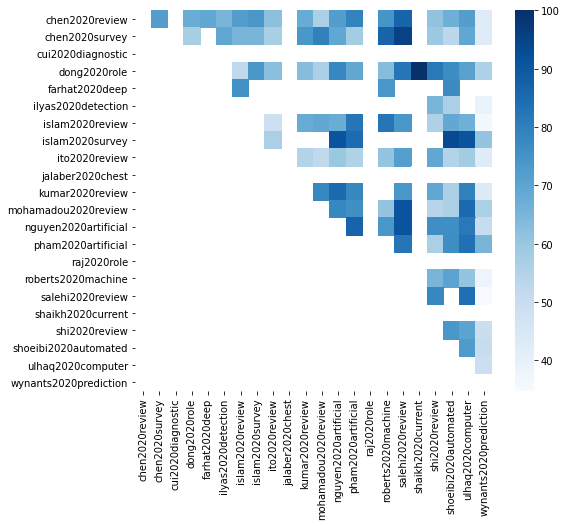

In [442]:
plt.figure(figsize=(8,7))
sns.heatmap(df_agreement_percent, cmap='Blues')

In [443]:
df_agreement_percent[df_agreement_percent >= 90].count()

chen2020review           0
chen2020survey           0
cui2020diagnostic        0
dong2020role             0
farhat2020deep           0
ilyas2020detection       0
islam2020review          0
islam2020survey          0
ito2020review            0
jalaber2020chest         0
kumar2020review          0
mohamadou2020review      0
nguyen2020artificial     1
pham2020artificial       0
raj2020role              0
roberts2020machine       0
salehi2020review         3
shaikh2020current        1
shi2020review            0
shoeibi2020automated     1
ulhaq2020computer        1
wynants2020prediction    0
dtype: int64

In [444]:
df_agreement_percent.mean()

chen2020review                  NaN
chen2020survey            72.282609
cui2020diagnostic               NaN
dong2020role              62.474120
farhat2020deep            69.565217
ilyas2020detection        67.391304
islam2020review           66.248606
islam2020survey           71.014493
ito2020review             57.358178
jalaber2020chest                NaN
kumar2020review           65.652174
mohamadou2020review       65.458937
nguyen2020artificial      75.371377
pham2020artificial        74.533011
raj2020role                     NaN
roberts2020machine        72.088509
salehi2020review          83.333333
shaikh2020current        100.000000
shi2020review             66.125345
shoeibi2020automated      68.477461
ulhaq2020computer         74.852731
wynants2020prediction     47.423886
dtype: float64

In [445]:
df_agreement_percent.describe()

,chen2020review,chen2020survey,cui2020diagnostic,dong2020role,farhat2020deep,ilyas2020detection,islam2020review,islam2020survey,ito2020review,jalaber2020chest,kumar2020review,mohamadou2020review,nguyen2020artificial,pham2020artificial,raj2020role,roberts2020machine,salehi2020review,shaikh2020current,shi2020review,shoeibi2020automated,ulhaq2020computer,wynants2020prediction
count,0.0,1.000000,0.0,2.000000,1.000000,2.000000,4.000000,3.000000,5.000000,0.0,5.000000,6.000000,8.000000,9.000000,0.0,8.000000,9.000000,1.0,12.000000,14.000000,14.000000,16.000000
mean,NaN,72.282609,NaN,62.474120,69.565217,67.391304,66.248606,71.014493,57.358178,NaN,65.652174,65.458937,75.371377,74.533011,NaN,72.088509,83.333333,100.0,66.125345,68.477461,74.852731,47.423886
std,NaN,NaN,NaN,7.393145,NaN,3.074377,10.297679,5.020437,5.545053,NaN,7.055456,12.000723,10.109405,11.323557,NaN,9.840973,8.695652,NaN,9.156209,11.666961,9.714376,8.949624
min,NaN,72.282609,NaN,57.246377,69.565217,65.217391,52.173913,65.217391,48.695652,NaN,55.072464,52.173913,59.782609,55.434783,NaN,60.869565,71.739130,100.0,54.347826,53.260870,58.385093,34.782609
25%,NaN,72.282609,NaN,59.860248,69.565217,66.304348,61.956522,69.565217,56.521739,NaN,63.043478,56.521739,69.130435,69.565217,NaN,62.500000,73.913043,100.0,58.850932,56.521739,69.746377,41.666667
50%,NaN,72.282609,NaN,62.474120,69.565217,67.391304,68.729097,73.913043,57.142857,NaN,68.115942,63.043478,75.362319,78.260870,NaN,73.913043,82.608696,100.0,65.217391,69.879863,72.403382,46.376812
75%,NaN,72.282609,NaN,65.087992,69.565217,68.478261,73.021182,73.913043,62.111801,NaN,68.115942,76.086957,80.072464,82.608696,NaN,76.552795,91.304348,100.0,71.195652,76.413043,83.242754,52.018634
max,NaN,72.282609,NaN,67.701863,69.565217,69.565217,75.362319,73.913043,62.318841,NaN,73.913043,79.710145,91.304348,86.956522,NaN,86.956522,95.652174,100.0,81.884058,93.478261,91.304348,65.217391


In [446]:
df_agreement_percent_full = (df_agreement_percent.transpose().fillna(0) + df_agreement_percent.fillna(0)).replace(0, np.nan)

In [447]:
df_agreement_percent_full.describe()

,chen2020review,chen2020survey,cui2020diagnostic,dong2020role,farhat2020deep,ilyas2020detection,islam2020review,islam2020survey,ito2020review,jalaber2020chest,kumar2020review,mohamadou2020review,nguyen2020artificial,pham2020artificial,raj2020role,roberts2020machine,salehi2020review,shaikh2020current,shi2020review,shoeibi2020automated,ulhaq2020computer,wynants2020prediction
count,17.000000,16.000000,0.0,16.000000,4.000000,5.000000,15.000000,9.000000,15.000000,0.0,13.000000,14.000000,15.000000,14.000000,0.0,12.000000,12.000000,1.0,15.000000,16.000000,15.000000,16.000000
mean,68.490206,67.212841,NaN,69.500518,74.003623,59.130435,65.744480,76.811594,57.842650,NaN,68.729097,68.012422,75.975845,73.954451,NaN,67.642340,78.925121,100.0,65.826432,67.639699,73.147573,47.423886
std,9.577844,13.161618,NaN,12.514889,3.245738,12.142817,12.708086,14.046574,7.313753,NaN,11.706305,13.242801,11.229408,11.043305,NaN,12.649618,15.826200,NaN,9.520608,11.810666,11.456086,8.949624
min,43.143813,42.512077,NaN,52.173913,69.565217,39.130435,36.086957,56.521739,42.753623,NaN,43.478261,52.173913,50.434783,55.434783,NaN,38.260870,34.782609,100.0,49.689441,50.724638,49.275362,34.782609
25%,65.217391,57.789855,NaN,61.050725,72.826087,56.521739,60.507246,65.217391,55.072464,NaN,63.043478,56.521739,71.014493,66.304348,NaN,60.869565,73.913043,100.0,58.074534,56.521739,68.206522,41.666667
50%,69.565217,67.391304,NaN,68.633540,74.637681,65.217391,68.115942,73.913043,57.142857,NaN,69.565217,65.217391,76.086957,77.391304,NaN,67.934783,82.608696,100.0,65.217391,69.879863,71.980676,46.376812
75%,72.463768,72.690217,NaN,77.173913,75.815217,65.217391,73.076923,91.304348,61.490683,NaN,78.260870,78.260870,83.695652,82.608696,NaN,74.068323,88.043478,100.0,72.101449,76.195652,82.789855,52.018634
max,86.956522,95.652174,NaN,100.000000,77.173913,69.565217,82.608696,93.478261,71.739130,NaN,85.507246,91.304348,91.304348,86.956522,NaN,86.956522,95.652174,100.0,81.884058,93.478261,91.304348,65.217391


In [448]:
df_agreement_percent_full[df_agreement_percent_full >= 90].count()

chen2020review           0
chen2020survey           1
cui2020diagnostic        0
dong2020role             1
farhat2020deep           0
ilyas2020detection       0
islam2020review          0
islam2020survey          3
ito2020review            0
jalaber2020chest         0
kumar2020review          0
mohamadou2020review      1
nguyen2020artificial     2
pham2020artificial       0
raj2020role              0
roberts2020machine       0
salehi2020review         3
shaikh2020current        1
shi2020review            0
shoeibi2020automated     1
ulhaq2020computer        1
wynants2020prediction    0
dtype: int64

In [449]:
# get list
# flatten it

values = [j for sub in df_agreement_percent.values.tolist() for j in sub]

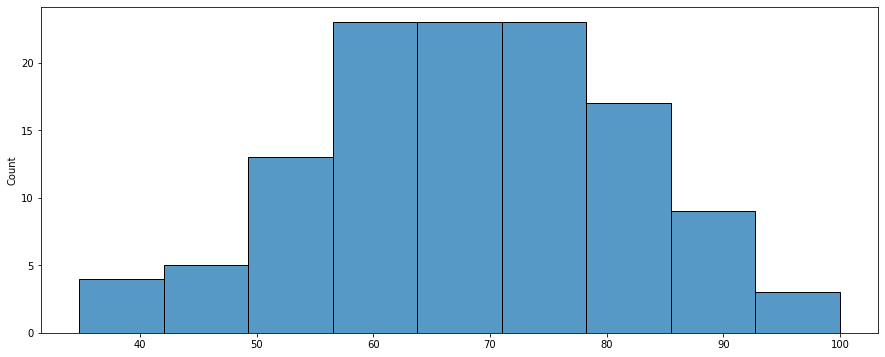

In [450]:
plt.figure(figsize=(15,6))
sns.histplot(values)